# **Decision Tree** on IRIS dataset where independent variables have numeric data

In [ ]:
# If our dataset is to big,then problem of "Overfitting" will occur in our model becoz size of our decision tree will be too big.
#So, to reduce the size of decision tree, we use a concept called "Pruning".
#Pruning reduced the size of decision tree.It is of 2 types -->
#(i) Post Pruning.{means applying pruning after creating the decision tree}
#(ii) Pre Pruning.{means applying pruning while creating the decision tree}

#Ye overfitting ki problem kese solve karega-->
# suppose humara dataset is large which means large decision tree, let say at step 'n' humari values[0,49,1] h , 
#so ,in this case we can conclude our decision tree here by passing "max_depth = n"
#becoz ratio of 49:1 is negligible and it does not have any large effect in accuracy.


#Here we are doing post pruning. Check Decision_Tree_Pre_Pruning for pre pruning.

In [ ]:
import pandas as pd
df=pd.read_csv('/content/Iris.csv')
X=df.drop('Species',axis='columns')
y=df['Species']

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
#hover on DecisionTreeClassifier to see different criterion that can be entered.
# BY default it calculates gini impurity.
#model=DecisionTreeClassifier()                   #Calling Constructor.   

#To calculate entropy inside of gini index with pass criterion ='entropy' in constructor. 

model=DecisionTreeClassifier(criterion='entropy')   

# 'max_depth' is used for pruning.
#model=DecisionTreeClassifier(criterion='entropy',max_depth=3)   #This will only decision tree till 3rd step.

model.fit(X,y)

In [ ]:
#Training complete data and testing data manually.
#Predicting on partial data.
print(model.predict([[3.5,2.4,5.6,0.9]]))                   
print('Accuracy',model.score(X,y))
print('-------------------------------------------------')

In [ ]:
import matplotlib.pyplot as plt

#fig function helps to plot in a virtual box of given dimension.  #figsize=(width,height)
#figsize=(width,height)
plt.figure(figsize=(15,10))    
from sklearn.tree import plot_tree                 #"plot_tree" constructor is used to print decision tree.
# plot_tree(model jiski training/testing kari thi, "filled=true" is used to show values inside boxes with coloumns name.)
#BY default it uses "Gini Impurity" and its maximum value is 0.5, and if 0 then pure split(no further split).
#Exceptional case--> Gini impurity of root node can be greater than 0.5.
plot_tree(model,filled=True)                     

#In output X[3] represents 3 column of dataset.
#value =[50,50,50] represent 50 entries each of setosa,versicolor and virginica.
#value[50,0,0] represent entries of setosa and rest have 0 entries , so it is pure split.

# **Decision Tree** on the dataset where independent variables does not have numerical data

In [ ]:
import pandas as pd
df=pd.read_csv('/content/play.csv')
df

,outlook,temp,humidity,wind,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rain,mild,high,False,yes
4,rain,cool,normal,False,yes
5,rain,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rain,mild,normal,False,yes


In [ ]:
X=df.drop('play',axis='columns')
y=df['play']
print(X)
print('------------------------------------------')
print(y)

     outlook  temp humidity   wind
0      sunny   hot     high  False
1      sunny   hot     high   True
2   overcast   hot     high  False
3       rain  mild     high  False
4       rain  cool   normal  False
5       rain  cool   normal   True
6   overcast  cool   normal   True
7      sunny  mild     high  False
8      sunny  cool   normal  False
9       rain  mild   normal  False
10     sunny  mild   normal   True
11  overcast  mild     high   True
12  overcast   hot   normal  False
13      rain  mild     high   True
------------------------------------------
0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: play, dtype: object


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()


In [ ]:
#model.fit(X,y)
#This gives error becoz dataset has data in string format and not numerial data.
# In Classfication, we separate data by boundary which is either line or hyperplane,i.e., points {means numerical data} not strings. 

In [ ]:
#In dependent variable, there is no change if data is either "String" or "Numeric".

In [ ]:
#Label Encoding refers to converting the labels into numeric form so as to convert them into the machine readable form.

In [ ]:
# Using LabelEncoder -->
#We are preprocessing here , becoz data ki training nhi hui h {fit gives error} due to string data.
from sklearn.preprocessing import LabelEncoder

#It is called 4 times here, becoz dataset has 4 olumns,i.e.,'outlook','temp','humidity', and 'wind'.
encoding1=LabelEncoder()
encoding2=LabelEncoder()
encoding3=LabelEncoder()
encoding4=LabelEncoder()

#Here, we are creating 4 new columns that contain not exact copy of original columns.
#Each new column created contains data in numeric form converted by "label encoder".
#"fit_transform" converts labels  into numeric data.
#And then  adding new columns to original dataset.
#{similar,to as we were adding target of dictionary to target of dataframe , d['target] = df['target']}.

X['outlook_n']=encoding1.fit_transform(X['outlook'])
X['temp_n']=encoding2.fit_transform(X['temp'])
X['humidity_n']=encoding3.fit_transform(X['humidity'])
X['wind_n']=encoding4.fit_transform(X['wind'])

In [ ]:
X

,outlook,temp,humidity,wind,outlook_n,temp_n,humidity_n,wind_n
0,sunny,hot,high,False,2,1,0,0
1,sunny,hot,high,True,2,1,0,1
2,overcast,hot,high,False,0,1,0,0
3,rain,mild,high,False,1,2,0,0
4,rain,cool,normal,False,1,0,1,0
5,rain,cool,normal,True,1,0,1,1
6,overcast,cool,normal,True,0,0,1,1
7,sunny,mild,high,False,2,2,0,0
8,sunny,cool,normal,False,2,0,1,0
9,rain,mild,normal,False,1,2,1,0


In [ ]:
X_n=X.drop(['outlook','temp','humidity','wind'],axis='columns')  #dropping label columns.

In [ ]:
X_n

,outlook_n,temp_n,humidity_n,wind_n
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0
5,1,0,1,1
6,0,0,1,1
7,2,2,0,0
8,2,0,1,0
9,1,2,1,0


In [ ]:
model.fit(X_n,y)    #Now,applying fit attribute for training data.

DecisionTreeClassifier()

In [ ]:
print(model.predict([[2,1,0,0]])) #Testing{passing first record}
#Answer --> "NO" {classifying correctly}

['no']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
model.score(X_n,y)  #Calculating accuracy.

1.0

[Text(0.4, 0.9, 'X[0] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5, 0.7, 'X[2] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.3, 0.5, 'X[0] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2, 0.3, 'X[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7, 0.5, 'X[3] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.3, 'X[1] <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

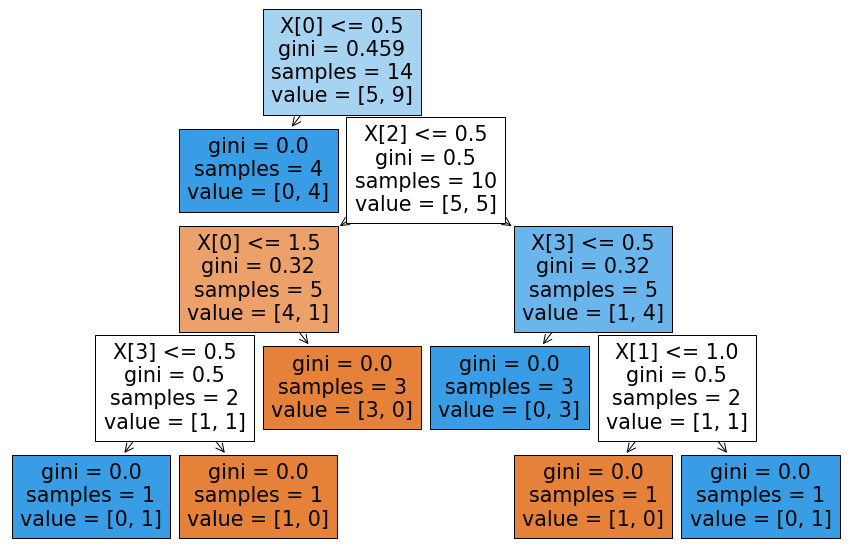

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
from sklearn.tree import plot_tree
plot_tree(model,filled=True)